In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import imageio
from glob import glob
from os.path import expanduser, basename, splitext
HOME = expanduser("~")
PATH = HOME+'/.kaggle/competitions/data-science-bowl-2018/'
from skimage.morphology import label
import re
key_pattern = re.compile(r'([a-z0-9]{64})')

In [2]:
paths = glob(PATH+'train/*/images/*.png')
train = {}
print(len(paths))
img = imageio.imread(paths[0])
print(img.shape)
mini = [999,999,5]
maxi = [0,0,0]
for path in paths:
    key = key_pattern.findall(path)[0]
    img = imageio.imread(path)
    train[key] = {'images':img[:,:,:3], 'masks':[]}
    if not np.all(img[:,:,3]==255):
        print('can not discard the forth channel')
    for i in range(len(img.shape)):
        maxi[i] = max(maxi[i], img.shape[i])
        mini[i] = min(mini[i], img.shape[i])
print(maxi)
print(mini)

670
(256, 256, 4)
[1040, 1388, 4]
[256, 256, 4]


65
(260, 347, 4) 3
lose one channel (520, 348, 3)
lose one channel (524, 348, 3)
lose one channel (520, 348, 3)
lose one channel (519, 253, 3)
lose one channel (256, 256, 3)
lose one channel (519, 161, 3)
lose one channel (512, 680, 3)
lose one channel (519, 253, 3)
lose one channel (256, 256, 3)
lose one channel (512, 680, 3)
lose one channel (512, 680, 3)
lose one channel (512, 680, 3)
lose one channel (520, 348, 3)
lose one channel (519, 161, 3)
lose one channel (256, 256, 3)
lose one channel (512, 680, 3)
lose one channel (519, 253, 3)
lose one channel (524, 348, 3)
lose one channel (256, 256, 3)
lose one channel (524, 348, 3)
lose one channel (524, 348, 3)
lose one channel (512, 680, 3)
lose one channel (520, 348, 3)
lose one channel (519, 162, 3)
lose one channel (519, 162, 3)
lose one channel (512, 680, 3)
lose one channel (512, 680, 3)
lose one channel (519, 253, 3)
[524, 696, 4]
[256, 161, 3]


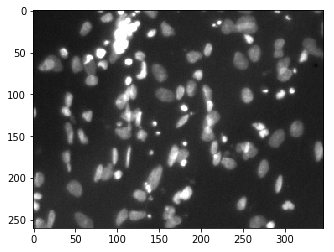

In [3]:
paths = glob(PATH+'test/*/images/*.png')
test = {}
print(len(paths))
img = imageio.imread(paths[0])
print(img.shape, len(img.shape))
plt.imshow(img)
mini = [999,999,5]
maxi = [0,0,0]
for path in paths:
    key = key_pattern.findall(key)[0]
    img = imageio.imread(path)
    test[key] = {'images':img[:,:,:3], 'masks':[]}
    if len(img.shape) != 3:
        print('lose one dimension {}'.format(img.shape))
    elif img.shape[2] != 4:
        print('lose one channel {}'.format(img.shape))
    elif not np.all(img[:,:,3]==255):
        print('can not discard the forth channel')
    for i in range(len(img.shape)):
        maxi[i] = max(maxi[i], img.shape[i])
        mini[i] = min(mini[i], img.shape[i])
print(maxi)
print(mini)

29461
(256, 256)


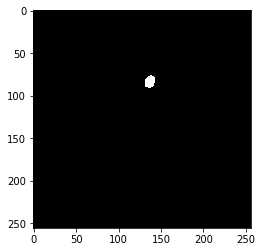

In [4]:
paths = glob(PATH+'train/*/masks/*.png')
print(len(paths))
img = imageio.imread(paths[0])
print(img.shape)
plt.imshow(img, cmap='gray')

for path in paths:
    key = key_pattern.findall(path)[0]
    img = imageio.imread(path)
    train[key]['masks'].append(img)

In [5]:
labelfile = PATH+'stage1_train_labels.csv'
train_labels = {}
with open(labelfile) as f:
    f.readline()
    for line in f:
        key, rawlabel = line.split(',')
        rawlabel = rawlabel.strip().split(' ')
        if key not in train_labels:
            train_labels[key] = []
        train_labels[key].append([(i,j) for i, j in zip(rawlabel[::2], rawlabel[1::2])])
        if key not in train:
            print(key)
len(train_labels['dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c'])

50

In [6]:
def mask_to_label(mask):
    labels = []
    start = None
    count = 0
    for i in np.reshape(np.argwhere(np.reshape(mask.T, (-1,))>0), (-1,)):
        if start and start+count==i:
            count += 1
        elif start:
            labels.append([start+1, count])
            start, count = i, 1
        else:
            start, count = i, 1
    labels.append([start+1, count])
    return labels

len(train['dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c']['masks'])
labels = mask_to_label(train['dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c']['masks'][0])
labels

[[21192, 6],
 [21445, 11],
 [21700, 13],
 [21955, 14],
 [22211, 15],
 [22466, 16],
 [22722, 16],
 [22978, 16],
 [23234, 15],
 [23490, 15],
 [23746, 14],
 [24003, 12],
 [24261, 8]]

* all training set images have 4 channels, but not all test set images have 4 channels
* all 4th channels should be discarded, because they keep nothing but 255
* all mask images have only 1 channel, and probably nothing but 0 and 255


In [7]:
print(len(train_labels['dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c']))
for label in train_labels['dad607a203483439fcbc2acecd0a39fb5e5a94a32a94348f5c802c79cfeb6e7c']:
    if label[0][0] == '21192':
        print(label)

50
[('21192', '6'), ('21445', '11'), ('21700', '13'), ('21955', '14'), ('22211', '15'), ('22466', '16'), ('22722', '16'), ('22978', '16'), ('23234', '15'), ('23490', '15'), ('23746', '14'), ('24003', '12'), ('24261', '8'), ('24519', '3')]


[[29875, 1], [29879, 2], [30131, 6], [30387, 6], [30643, 5]]


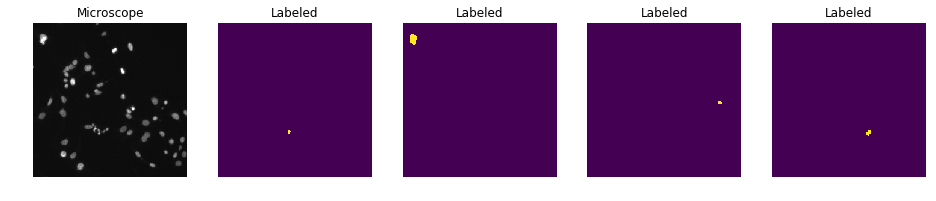

In [24]:
key = 'fd8065bcb1afdbed19e028465d5d00cd2ecadc4558de05c6fa28bea3c817aa22'
key = 'a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288'
key = 'c901794d1a421d52e5734500c0a2a8ca84651fb93b19cec2f411855e70cae339'
key = '094afe36759e7daffe12188ab5987581d405b06720f1d5acf3f2614f404df380'
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,8))
ax1.imshow(train[key]['images'])
ax1.axis('off')
ax1.set_title('Microscope')

ax2.imshow(train[key]['masks'][0])
ax2.axis('off')
ax2.set_title('Labeled')

ax3.imshow(train[key]['masks'][1])
ax3.axis('off')
ax3.set_title('Labeled')

ax4.imshow(train[key]['masks'][2])
ax4.axis('off')
ax4.set_title('Labeled')

ax5.imshow(train[key]['masks'][3])
ax5.axis('off')
ax5.set_title('Labeled')

print(mask_to_label(train[key]['masks'][0]))

In [12]:
max([len(train[key]['masks']) for key in train]), max(len(train_labels[key]) for key in train_labels)

(375, 375)

In [13]:
for key in train:
    if len(train[key]['masks']) == 375:
        print(key)

a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288


In [39]:
mini = 999
maxi = 1
summs = []
for key in train_labels:
    for mask in train_labels[key]:
        summ = sum([int(line[1]) for line in mask])
        summs.append(summ if summ < 2000 else 2000)
    if summ == 21 or summ == 7259:
        print(summ, key)
    mini = min(mini, summ)
    maxi = max(maxi, summ)
print(mini, maxi, len(summs))

21 094afe36759e7daffe12188ab5987581d405b06720f1d5acf3f2614f404df380
21 3852c7e45bd885b9537e276861ab50b99bb42f0f8e717d2f88174c62862ca3ff
21 449a9c32e53a37c8a86e01c199155c8da3958b631088e10f6fe43c2119defe51
21 72e8c49dea44787114fd191f9e97e260f961c6e7ae4715bc95cc91db8d91a4e3
21 8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832
21 9c95eae11da041189e84cda20bdfb75716a6594684de4b6ce12a9aaadbb874c9
21 aa47f0b303b1d525b52452ae3a8553b2d61d719a28aee547e2ef1fc6730a078f
21 b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229
7259 c901794d1a421d52e5734500c0a2a8ca84651fb93b19cec2f411855e70cae339
21 dec1764c00e8b3c4bf1fc7a2fda341279218ff894186b0c2664128348683c757
21 7259 29461


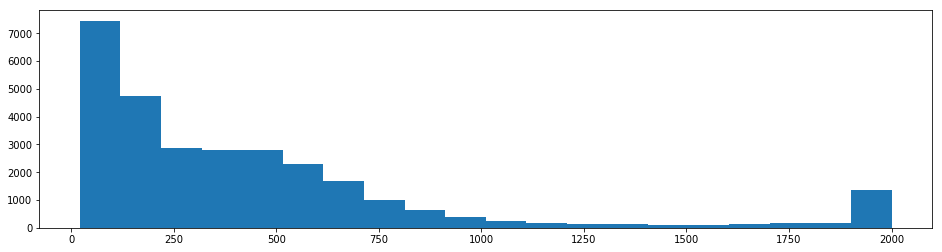

In [42]:
plt.figure(figsize=(16,4))
plt.hist(summs, bins=20);

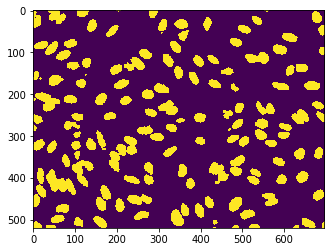

In [54]:
preds = {}
for key in train:
    for mask in train[key]['masks']:
        if key in preds:
            preds[key] = np.maximum(mask, preds[key])
        else:
            preds[key] = mask
    preds[key] = preds[key]/255
plt.imshow(preds[key])

In [164]:
def iou(target, mask):
    intersect = np.count_nonzero(target&mask)
    if intersect:
        return intersect/np.count_nonzero(target|mask)
    else:
        return 0
def scoring(pred, masks):
    # split pred into one target per array
    target_map, target_num = label(pred > 0.5, return_num=True)
    print(target_num, len(masks))
    # calculate iou with each mask for each pred_target
    iouArray = [[iou(target_map==idx, mask) for idx in range(1, target_num+1)]for mask in masks]
    
    score = []
    for threshold in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        # calculate TP, FP, FN
        TP = 0
        for i, iouList in enumerate(iouArray):
            if max(iouList) > threshold:
                TP += 1
        FN = len(masks) - TP
        FP = len(targets) - TP
        # calculate the score
        score.append(TP / (TP+FN+FP))
    # return score
    print(score)
    return sum(score)/len(score)
scoring(preds[key], train[key]['masks'])
#targets, num = label(preds[key]>0.5, return_num=True)
#for i, mask in enumerate(train[key]['masks']):
#    print(i, iou((targets==137), mask))

142 170
[0.25, 0.23655913978494625, 0.23214285714285715, 0.2277580071174377, 0.2255772646536412, 0.2255772646536412, 0.22340425531914893, 0.22340425531914893, 0.22340425531914893, 0.21693121693121692]


0.22847585162411868

171 170
[0.3142857142857143, 0.3068181818181818, 0.30434782608695654, 0.2994350282485876, 0.2945590994371482, 0.2777777777777778, 0.24773960216998192, 0.12745098039215685, 0.001451378809869376, 0.001451378809869376]
0.2175316967836244


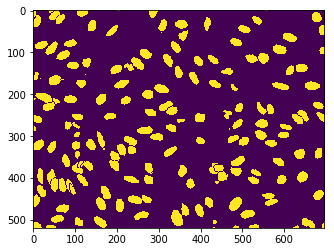

In [165]:
def merge_masks(masks):
    ret = masks[0]
    for mask in masks[1:]:
        mask_ = mask/255
        hp = np.insert(np.diff(mask_, axis=1)>0, 0, 0, axis=1)
        hn = np.insert(np.diff(mask_, axis=1)<0, -1, 0, axis=1)
        vp = np.insert(np.diff(mask_, axis=0)>0, 0, 0, axis=0)
        vn = np.insert(np.diff(mask_, axis=0)<0, -1, 0, axis=0)
        mask_ = (hp|hn|vp|vn)*255
        ret = np.maximum(ret, mask - mask_)
    return ret
merged = merge_masks(train[key]['masks'])
plt.imshow(merged)
score = scoring(merged, train[key]['masks'])
print(score)

In [155]:
mask[350:380, 80:90]

array([[  0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0

In [156]:
train[key]['masks'][0][350:380, 80:90]

Image([[255, 255, 255, 255,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0